In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# do the test answers change?

In [18]:
df = pd.read_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned.parquet')
df = df.query('task=="smooth-or-featured"')

df_agg = df.groupby('subject_ids').agg({'task': 'count', 'created_at': 'max'}).reset_index()

In [19]:
in_test = df_agg.query('task > 20')['subject_ids'].unique()
len(in_test)

6615

In [20]:

df['month'] = pd.to_datetime(df['created_at']).dt.to_period('M').dt.to_timestamp()
df['month'] = df['month'].dt.strftime('%Y-%m')
df = df.sort_values(by=['month'])


/tmp/ipykernel_55546/3650260819.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = pd.to_datetime(df['created_at']).dt.to_period('M').dt.to_timestamp()


In [21]:

test = df[df['subject_ids'].isin(in_test)]
other = df[~df['subject_ids'].isin(in_test)]

In [22]:
other

,task,value,id_str,user_id,classification_id,created_at,subject_ids,month
0,smooth-or-featured,featured-or-disk,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135,2024-08
1042945,smooth-or-featured,smooth,c1a3475a1bb27dc7ffe07bbd3414100c9213d3e9257fe1...,2749374,577704937,2024-08-14 17:23:52+00:00,101114848,2024-08
1042942,smooth-or-featured,smooth,5e4b9d711555082ded3f0c22ed6477c6276095093a038f...,2749374,577704910,2024-08-14 17:23:48+00:00,101117082,2024-08
1042939,smooth-or-featured,smooth,ef2a75caf750ece85d8e5326a5de007ea27b031b130fd4...,2749374,577704892,2024-08-14 17:23:46+00:00,101117748,2024-08
1042930,smooth-or-featured,featured-or-disk,faa014a45f29b67798242832bda161942cadf1c811cd1a...,f18c068332041b391ba0,577704876,2024-08-14 17:23:43+00:00,101116996,2024-08
...,...,...,...,...,...,...,...,...
4745787,smooth-or-featured,smooth,5188b1f520233cf8f16a9b6717ea8018a8c16880d61537...,8d02ac618d33811b6785,619358795,2025-03-04 00:23:18+00:00,101518144,2025-03
4745671,smooth-or-featured,featured-or-disk,602c9d60bdd68d51c2a0e4138bce2996e912fc30330126...,e0b56dd6bd037c3eb13e,619358247,2025-03-04 00:19:40+00:00,101517232,2025-03
4747712,smooth-or-featured,featured-or-disk,0be08864ab4f73273a9ce25d01044b98ce246a927c3f2d...,2827111,619377246,2025-03-04 02:38:28+00:00,101516335,2025-03
4748608,smooth-or-featured,problem,f40f15788b52abc799ed9f39e958418edf535e1ede4d98...,79650ce63e4ac24fe22a,619402414,2025-03-04 05:28:23+00:00,101517600,2025-03


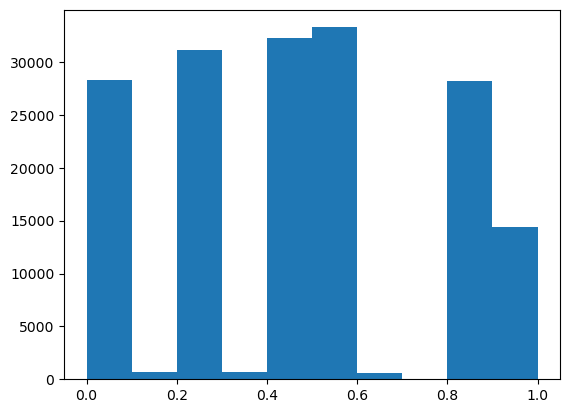

In [23]:
_ = plt.hist(other.groupby('subject_ids').agg({'value': lambda x: (x == 'smooth').mean()}))

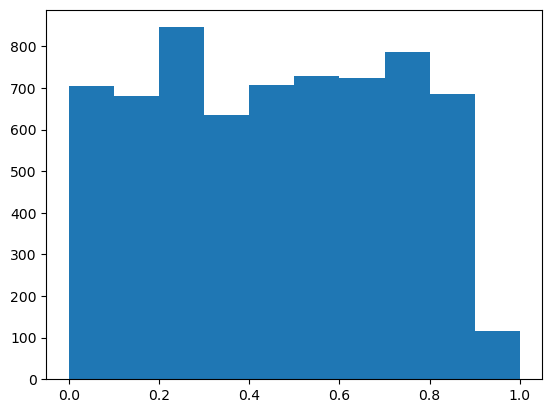

In [24]:
_ = plt.hist(test.groupby('subject_ids').agg({'value': lambda x: (x == 'smooth').mean()}))

In [43]:
months = df['month'].unique()

test_dists = []
other_dists = []
for month in months:
    print(month)

    test_month = test.query('month==@month')
    test_dist = test_month.groupby('subject_ids').agg({
        'value': lambda x: (x == 'featured-or-disk').mean(),
        'created_at': 'count'
        }).reset_index()
    test_dists.append(test_dist)

    other_month = other.query('month==@month')
    other_dist = other_month.groupby('subject_ids').agg({
        'value': lambda x: (x == 'featured-or-disk').mean(),
        'created_at': 'count'
        }).reset_index()
    other_dists.append(other_dist)


2024-08
2024-09
2024-10
2024-11
2024-12
2025-01
2025-02
2025-03
2025-04


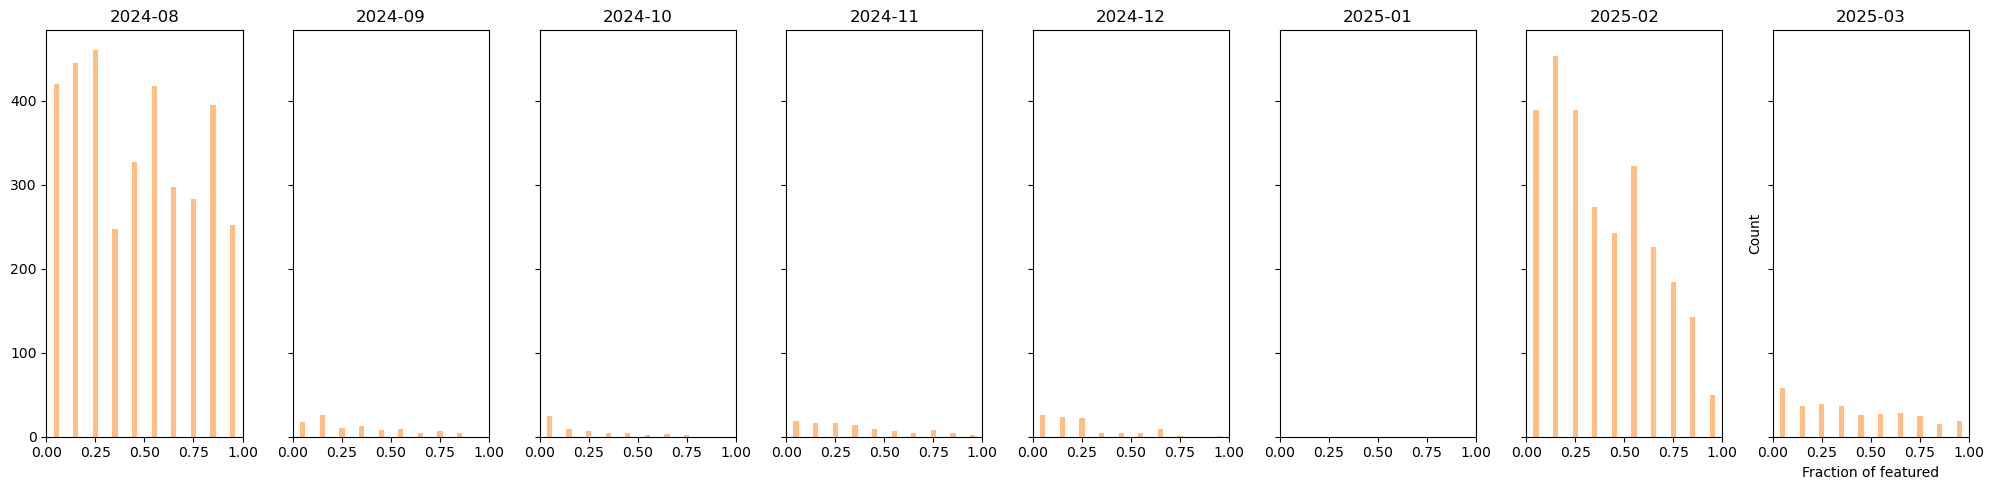

In [44]:


fig, axes=  plt.subplots(figsize=(20, 5), ncols=8, sharex=True, sharey=True)
for i, month in enumerate(months):
    if i >= 8:
        break
    ax = axes[i]
    ax.set_title(month)
    test_dist = test_dists[i].query('created_at > 12')  # removes test subjects which haven't yet had many votes
    ax.hist(test_dist, bins=10, range=(0, 1), alpha=0.5)
    plt.xlabel('Fraction of featured')
    plt.ylabel('Count')
    plt.xlim(0, 1)
plt.tight_layout()

# high-N test subjects in August were somewhat more featured than in Feb
# (lesson learned here - use high N subjects throughout)

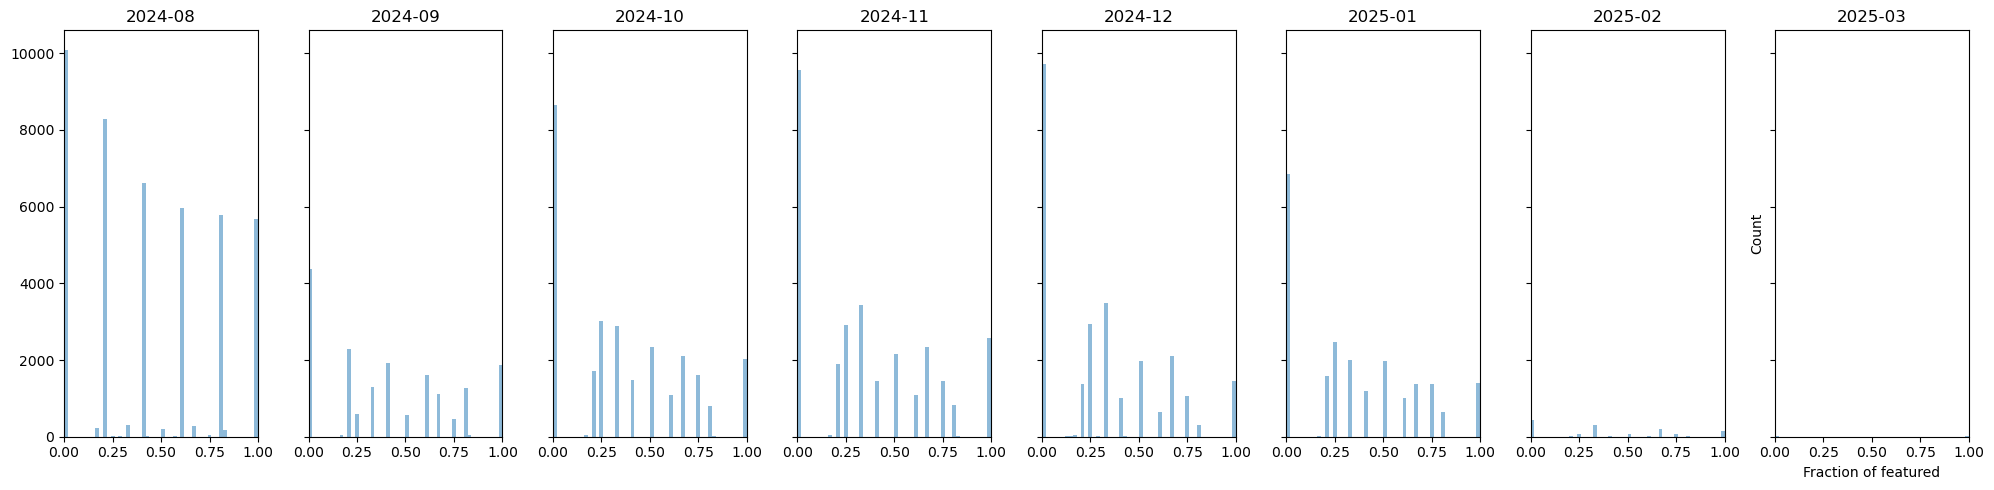

In [ ]:

fig, axes=  plt.subplots(figsize=(20, 5), ncols=8, sharex=True, sharey=True)
for i, month in enumerate(months):
    if i >= 8:
        break
    ax = axes[i]
    ax.set_title(month)
    other_dist = other_dists[i].query('created_at >= 3')
    ax.hist(other_dist['value'], bins=50, range=(0, 1), alpha=0.5)
    plt.xlabel('Fraction of featured')
    plt.ylabel('Count')
    plt.xlim(0, 1)
plt.tight_layout()

# any difference is a bit small to tell with N=5ish

In [61]:
import seaborn as sns

In [100]:
user_vs_time = df.groupby('user_id').agg({'created_at': 'max'}).reset_index()
early_leavers = user_vs_time[user_vs_time['created_at'] < pd.to_datetime('2024-12-01', utc=True)]['user_id'].unique()
early_leavers

array(['00271f0a2c2b52f8c35d', '007d311a3654f40db132',
       '00816cbcba0306a4a4ca', ..., 'fe176cd00dd86ad6ba9a',
       'fe89001e4b69fe2c708a', 'fec1c8598380a3206027'], dtype=object)

In [101]:
test

,task,value,id_str,user_id,classification_id,created_at,subject_ids,month
1067767,smooth-or-featured,featured-or-disk,bfeef49b34507740fecd3021343cb09c9e969409de52b2...,382508,577851296,2024-08-15 03:35:20+00:00,101106349,2024-08
1073533,smooth-or-featured,featured-or-disk,a3b222e53204bd3c151ee4da4ea5176d47d6b2e9768edc...,2274,577874619,2024-08-15 07:19:21+00:00,101298600,2024-08
1073530,smooth-or-featured,smooth,a71623dc98025b31d2fdac4f3781cd6be2e6f4d23dbd87...,2761313,577874610,2024-08-15 07:19:18+00:00,101297685,2024-08
1073523,smooth-or-featured,featured-or-disk,c58c83ff7b0d0d1ab8c55b5363bda27532d5742eff9da9...,2761313,577874580,2024-08-15 07:18:58+00:00,101297323,2024-08
1073516,smooth-or-featured,featured-or-disk,c3fe047554e7de77246ed1b3aa93fd481ea20fe1b9b82e...,2061931,577874577,2024-08-15 07:18:57+00:00,101298314,2024-08
...,...,...,...,...,...,...,...,...
4747420,smooth-or-featured,smooth,8a8ee024439b9477132740d08435c1626ab3ca21e0109b...,2838220,619375341,2025-03-04 02:29:51+00:00,101517597,2025-03
4827457,smooth-or-featured,problem,d7dd462d59cd3f1f6a6658e58f4f40b3c0b6169d5488c9...,2082107,627521051,2025-04-02 09:48:40+00:00,101517359,2025-04
4827445,smooth-or-featured,featured-or-disk,77c3dbd37af827c210e5434374fe6682ede43fb3d21ecb...,2082107,627520987,2025-04-02 09:48:04+00:00,101519023,2025-04
4827454,smooth-or-featured,smooth,6f3c4bc3ec03ced61f0deb818749575409883e471cc308...,2082107,627521019,2025-04-02 09:48:20+00:00,101518414,2025-04


In [102]:
# first test subject was august 15th

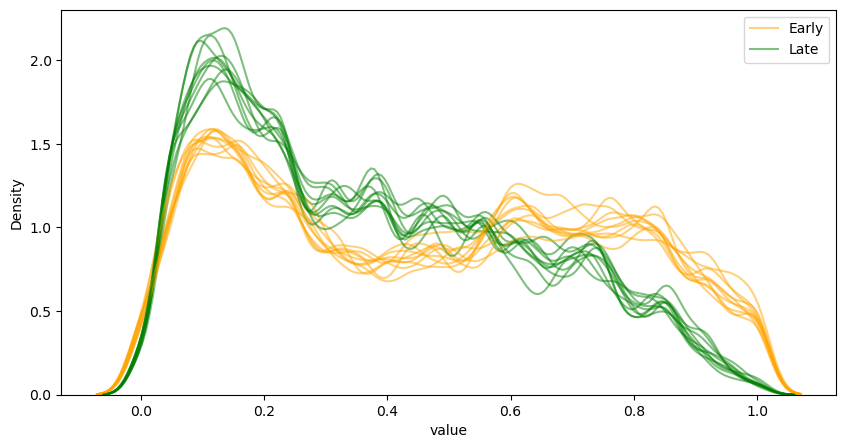

In [ ]:
test_early = test[test['created_at'] < "2024-10-01"]
# test_early = test[(test['created_at'] < "2024-10-01") & (test['created_at'] > "2024-09-01")]
test_late = test[test['created_at'] > "2024-12-01"]

test_left = test[test['user_id'].isin(early_leavers)]
test_stayed = test[~test['user_id'].isin(early_leavers)]

test_early_agg = test_early.groupby('subject_ids').agg({
        'value': lambda x: (x == 'featured-or-disk').mean(),
        'created_at': 'count'
        }).reset_index().query('created_at > 10')

test_late_agg = test_late.groupby('subject_ids').agg({
        'value': lambda x: (x == 'featured-or-disk').mean(),
        'created_at': 'count'
        }).reset_index().query('created_at > 10')

test_left_agg = test_left.groupby('subject_ids').agg({
        'value': lambda x: (x == 'featured-or-disk').mean(),
        'created_at': 'count'
        }).reset_index().query('created_at > 10')

test_stayed_agg = test_stayed.groupby('subject_ids').agg({
        'value': lambda x: (x == 'featured-or-disk').mean(),
        'created_at': 'count'
        }).reset_index().query('created_at > 10')



fig, ax = plt.subplots(figsize=(10, 5))

# bins = np.linspace(0, 1, 50)
# ax.hist(test_early_agg['value'], bins=bins, alpha=0.5, label='Early', density=True)
# ax.hist(test_late_agg['value'], bins=bins, alpha=0.5, label='Late', density=True)

bw_method = 0.08
bootstrap_frac = 0.75
bootstrap_n = 10

for n in range(bootstrap_n):
    test_early_sample = test_early_agg.sample(frac=bootstrap_frac, replace=True)
    test_late_sample = test_late_agg.sample(frac=bootstrap_frac, replace=True)
    # test_left_sample = test_left_agg.sample(frac=bootstrap_frac, replace=True)
    # test_stayed_sample = test_stayed_agg.sample(frac=bootstrap_frac, replace=True)

    if n==0:
        label_a = 'Early'
        label_b = 'Late' 
        label_c = 'Left'
        label_d = 'Stayed'
    else:
        label_a = None
        label_b = None
        label_c = None
        label_d = None

    sns.kdeplot(test_early_sample['value'], alpha=0.5, label=label_a, ax=ax, bw_method=bw_method, color='orange')
    sns.kdeplot(test_late_sample['value'], alpha=0.5, label=label_b, ax=ax, bw_method=bw_method, color='green')
    # this should match the early sample, by definition
    # sns.kdeplot(test_left_sample['value'], alpha=0.5, label=label_c, ax=ax, bw_method=bw_method, color='b')
    # this is the rough average of the early and late samples, by definition
    # sns.kdeplot(test_stayed_sample['value'], alpha=0.5, label=label_d, ax=ax, bw_method=bw_method, color='r')

# ax.axvline(test_early_agg['value'].mean(), color='b', linestyle='--', label='Early mean')
# ax.axvline(test_late_agg['value'].mean(), color='r', linestyle='--', label='Late mean')

ax.legend()

# early test set is a little less featured than late test set
# I would expect models trained on all data, which is weighted later, 
# to make slightly less featured predictions than the early test set expects
# that is what we see in the paper


# is it that the first two weeks saw many unusual classifications, and that causes the test sets (created after the first two weeks)
# to be slightly different to the train

# or is it that the people using the site between mid-Aug and mid-Oct are different to those using after Dec,
# causing the first test set to be slightly different to the second test set?

# comparing:
# the early test set (late august) is indeed a little bit different to the later test set (dec)
# the answers from people who started late august but left by the end of the year are a the same as for those who stayed


# people using the site after mid-august are to different to those after mid-dec,
# because the early and late test sets are different - though the difference is small

# by eye, the late shape looks more similar to the long term train set
# so simplest solution is to use only the late test set (and also drop the first few week users for good measure)

# I would like a proper way to test this, but it might have to wait
# hopefully this fixes it for now


In [110]:
test_left_agg

,subject_ids,value,created_at
0,101106262,0.269231,26
1,101106263,0.521739,23
2,101106264,0.088235,34
3,101106265,0.000000,32
4,101106266,0.000000,27
...,...,...,...
3640,101300624,0.857143,14
3641,101300625,0.307692,13
3642,101300626,0.166667,12
3643,101300627,0.125000,16


In [111]:
len(test_early), len(test_late)

(107089, 84208)